In [14]:
import numpy as np
from matplotlib import pyplot as plt
from utils import * 

In [24]:
L=257  # system size 2**n+1
N=1000 # number of realisations

p=0.34 # prob. of hopping in the same direction as the previous hop 
q=0.33

hs = np.arange(0.4, 0.6, 0.01) 
n = int(np.floor(np.log2(L)) - 1)

edge_reach_frac = [] 
binders = [] 

for h in hs:
    filename = 'data_L{}_N{}_p{}_q{}_h{:g}.dat'.format(L, N, p, q, h)
    file = open(filename)
    realisations, moments = read_file(file, verbose=False) 
    
    times = [] 
    msds = [] 
    tot_edge_reach = 0 
    tot_possible_edge = len(realisations)*4 
    binder = np.zeros((n))

    for (i, realisation) in enumerate(realisations):

        time, msd, edge_reach, coarse_grain_moments = extract_lite(realisation, n)
        times.append(time)
        msds.append(msd)
        tot_edge_reach += np.sum(edge_reach>0)

        m2 = coarse_grain_moments[:, 2] 
        m4 = coarse_grain_moments[:, 4]
        binder += 1 - (m4/(3*m2*m2)) ## maybe dont add binder? 
        
    edge_reach_frac.append(tot_edge_reach/tot_possible_edge)
    binders.append(binder/len(realisations))

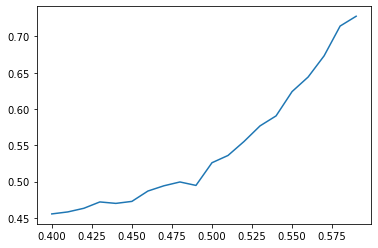

In [26]:
plt.plot(hs, edge_reach_frac)
plt.show() 

(20, 7)


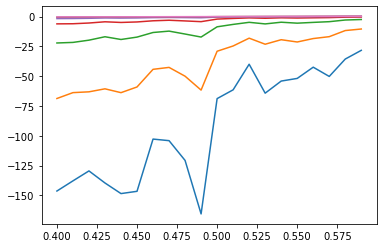

In [30]:
binders = np.vstack(binders)
print(binders.shape)

for i in range(n): 
    plt.plot(hs, binders[:, i])